## 머신러닝의 기본 요소

### 드문 특성과 가짜 상관관계

#### MNIST에 백색 잡음 픽셀과 0픽셀 추가하기

In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

#### 백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10


2026-01-26 16:57:24.913038: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301056000 exceeds 10% of free system memory.


367/375 [============================>.] - ETA: 0s - loss: 0.6225 - accuracy: 0.8116

2026-01-26 16:57:27.534341: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 75264000 exceeds 10% of free system memory.


375/375 [==============================] - 3s 6ms/step - loss: 0.6151 - accuracy: 0.8135 - val_loss: 0.3618 - val_accuracy: 0.8754
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2495 - accuracy: 0.9223 - val_loss: 0.2103 - val_accuracy: 0.9369
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1591 - accuracy: 0.9512 - val_loss: 0.1601 - val_accuracy: 0.9532
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1140 - accuracy: 0.9640 - val_loss: 0.1262 - val_accuracy: 0.9614
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0823 - accuracy: 0.9747 - val_loss: 0.1261 - val_accuracy: 0.9635
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0609 - accuracy: 0.9807 - val_loss: 0.1139 - val_accuracy: 0.9682
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0459 - accuracy: 0.9851 - val_loss: 0.1185 - val_accuracy: 0.9678
Epoch 8/10
375/37

2026-01-26 16:57:49.593435: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301056000 exceeds 10% of free system memory.


368/375 [============================>.] - ETA: 0s - loss: 0.2916 - accuracy: 0.9148

2026-01-26 16:57:53.554394: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 75264000 exceeds 10% of free system memory.


375/375 [==============================] - 3s 8ms/step - loss: 0.2884 - accuracy: 0.9158 - val_loss: 0.1649 - val_accuracy: 0.9503
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1203 - accuracy: 0.9646 - val_loss: 0.1096 - val_accuracy: 0.9674
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0789 - accuracy: 0.9773 - val_loss: 0.0902 - val_accuracy: 0.9726
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0563 - accuracy: 0.9835 - val_loss: 0.0847 - val_accuracy: 0.9752
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0426 - accuracy: 0.9877 - val_loss: 0.0913 - val_accuracy: 0.9744
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0317 - accuracy: 0.9909 - val_loss: 0.0814 - val_accuracy: 0.9768
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0246 - accuracy: 0.9927 - val_loss: 0.0850 - val_accuracy: 0.9778
Epoch 8/10
375/37

#### 검증 정확도 비교 그래프 그리기

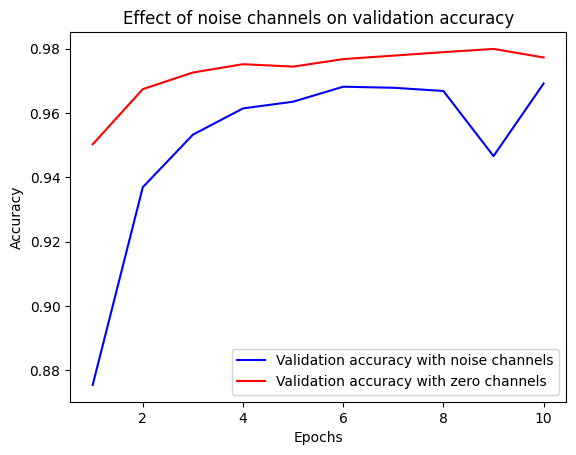

In [9]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label = "Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "r-",
        label = "Validation accuracy with zero channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 랜덤하게 섞은 레이블로 MNIST 모델 훈련하기

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100


2026-01-26 17:17:40.041792: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


375/375 [==============================] - 3s 6ms/step - loss: 2.3168 - accuracy: 0.1021 - val_loss: 2.3081 - val_accuracy: 0.1033
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2998 - accuracy: 0.1174 - val_loss: 2.3136 - val_accuracy: 0.1026
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2906 - accuracy: 0.1282 - val_loss: 2.3193 - val_accuracy: 0.0975
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2767 - accuracy: 0.1402 - val_loss: 2.3260 - val_accuracy: 0.1023
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2594 - accuracy: 0.1521 - val_loss: 2.3319 - val_accuracy: 0.0975
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2385 - accuracy: 0.1677 - val_loss: 2.3655 - val_accuracy: 0.0988
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2141 - accuracy: 0.1817 - val_loss: 2.3641 - val_accuracy: 0.0988
Epoch 8/100

## Notes

##### 과소적합과 과대적합

- 훈련 초기에 최적화와 일반화는 상호 연관되어 있다. 훈련 데이터의 손실이 낮아질 수록 테스트 데이터의 손실도 낮아진다. 이런 상황이 발생할 때, 모델이 과소적합되었다고 하고, 모델의 성능이 계속 발전될 여지가 있다.

- 하지만 훈련 데이터에서 훈련을 특정횟수만큼 반복하고 난 후에는 일반화 성능이 더 이상 높아지지 않으며 검증 세트의 성능이 멈추고 감소되기 시작한다. 즉, 모델이 과대적합 되기 시작한다. 이는 훈련 데이터에 특화된 패턴을 학습하기 시작했다는 의미이다. 과대적합은 데이터에 잡음이 있거나, 불확실성이 존재하거나, 드문 특성이 포함되어 있을때 특히 발생하기 쉽다.

##### 불확실한 특성

- 모든 데이터 잡음이 부정확성 때문에 발생하는 것은 아니고, 문제에 불확실성과 모호성이 있다면 완벽하고 깔끔하게 레이블이 부여된 데이터라도 잡음이 있을 수 있다. 레이블을 부여하고 할당하는 사람마다 객관적인 경계가 없어서 다르게 부여될 수 있기 때문이다.

##### 매니폴드 가설

- 실제 세상의 모든 데이터가 고차원 공간 안에 있는 저차원 매니폴드에 놓여 있다고 가정하는 것이 *매니폴드 가설*이다. 

- 머신 러닝 모델은 가능한 입력 공간안에서 비교적 간단하고, 저차원이며, 매우 구조적인 부분 공간(잠재 매니폴드)만 학습하면 된다.

- 이런 매니폴드 중 하나 안에서 두 입력 사이를 보간하는 것이 항상 가능하다. 즉, 연속적인 경로를 따라 한 입력에서 다른 입력으로 변형할때 모든 포인트가 이 매니폴드에 속한다.

- 선형 보간과 매니폴드 보간은 차이가 있다. 예를 들어, 2개의 MNIST 숫자 사이의 픽셀을 평균하면 일반적으로 유효한 숫자가 만들어지지 않는다. 즉 매니폴드 보간은 잠재 매니폴드에서의 중간 포인트가 된다. 그러나, 선형 보간은 인코딩 공간에서의 평균이다. 

##### 단순 홀드아웃 검증

- 데이터의 일정량을 테스트 세트로 떼어놓는다. 남은 데이터에서 훈련하고 테스트 세트로 평가한다.

- 단점으로는, 데이터가 적을때는 검증 세트와 테스트 세트의 샘플이 너무 적어 주어진 전체 데이터를 통계적으로 대표하지 못할 수 있다.

##### K-겹 교차검증

- 데이터를 동일한 크기를 가진 K개의 분할로 나눈다. 각 분할 i에 대해 남은 K-1 개의 분할로 모델을 훈련하고 분할 i에서 모델을 평가하고, 최종 점수는 이렇게 얻은 k개의 점수를 평균한다.

- K-겹 교차 검증을 여러번 적용하되, K개의 분할로 나누기 전에 매번 데이터를 무작위로 섞는다. 최종 점수는 모든 K-겹 교차 검증을 실행해서 얻은 점수의 평균이 된다.

##### 모델 평가에 대해 유념해야 할 점

- 대표성 있는 데이터 : 훈련 세트와 테스트 세트가 주어진 데이터에 대한 대표성이 있어야 한다. 예를 들어, 숫자 이미지를 분류하는 문제에서 샘플 배열이 클래스 순서대로 나열되어 있다고 가정했을때, 훈련 세트에는 0~7 숫자만 담겨있고, 테스트 세트에는 8~9 숫자만 담기게 된다. 이런 이유 때문에 훈련 세트와 테스트 세트로 나누기 전에 데이터를 무작위로 섞는 것이 일반적이다.

- 시간의 방향 : 과거로부터 미래를 예측하려고 한다면 데이터를 분할하기 전에 무작위로 섞어서는 안된다. 이렇게 하면 미래의 정보가 누설되기 때문이다.

- 데이터 중복 : 한 데이터셋에 어떤 데이터 포인트가 두번 등장하면 안된다.